#### Описание данных

Yеобходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` - порядковый номер записи в датасете
* `Name` - наименование игры
* `Platform` - платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` - год выпуска игры
* `Genre` - жанр игры
* `Publisher` - наименование компании-издателя игры
* `NA_Sales` - объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` - объем продаж игры в Европе, млн. копий
* `JP_Sales` - объем продаж игры в Японии, млн. копий
* `Other_Sales` - объем продаж игры в остальных странах, млн. копий
* `Global_Sales` - объем продаж игры по всему миру, млн. копий


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка данных

In [ ]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задача 1

Постройте линейный график динамики объема продаж всех игр жанра "Sports" в Японии. Задайте графику размер 12 на 6

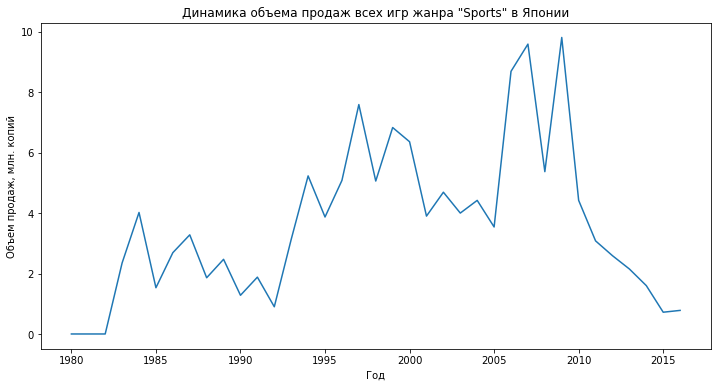

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
dat = df[df['Genre'] == 'Sports'].groupby('Year')['JP_Sales'].sum()
ax.plot(dat)
ax.set_title('Динамика объема продаж всех игр жанра "Sports" в Японии')
ax.set_xlabel('Год')
ax.set_ylabel('Объем продаж, млн. копий')
plt.show()


### Задача 2

В одних координатных осях постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

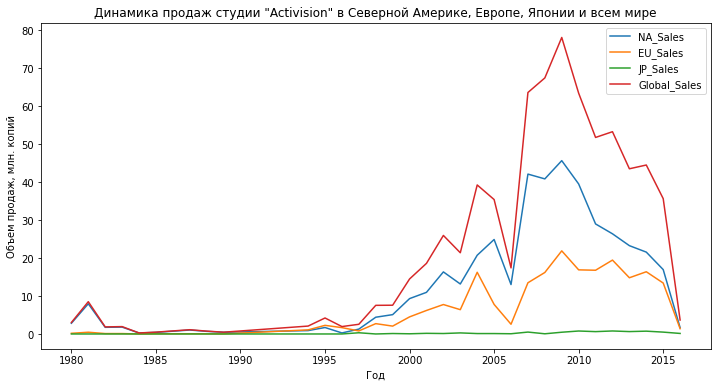

In [ ]:
sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']

fig, ax = plt.subplots(figsize=(12,6))
for i_sales in sales:
    data = df[df['Publisher'] == 'Activision'].groupby('Year')[i_sales].sum()
    ax.plot(data, label= i_sales)
    ax.legend()
    
ax.set_title('Динамика продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире')
ax.set_xlabel('Год')
ax.set_ylabel('Объем продаж, млн. копий')

plt.show()


### Задача 3

В цикле (т.е. на разных координатных осях) постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

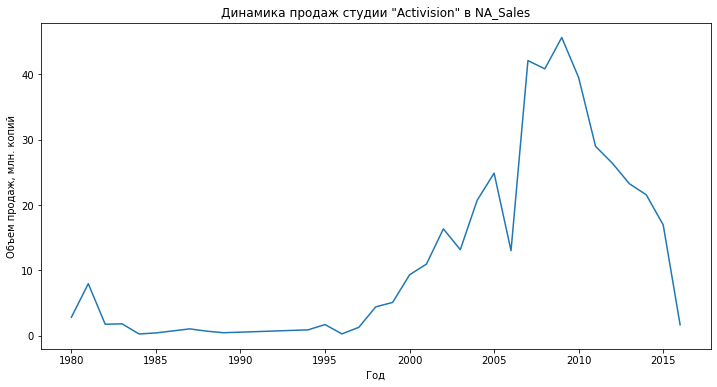

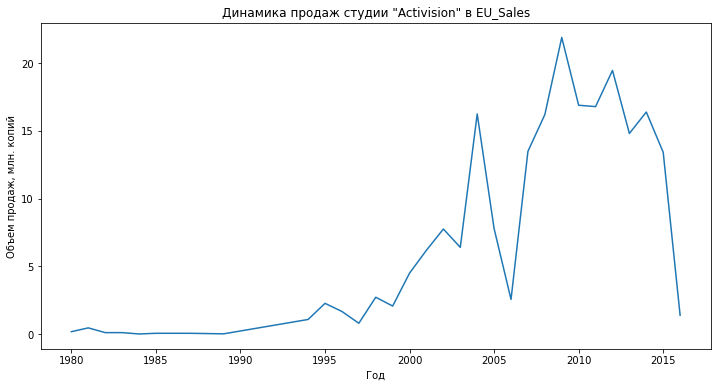

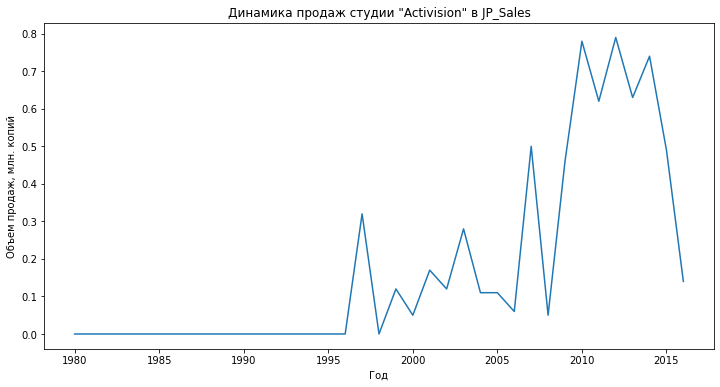

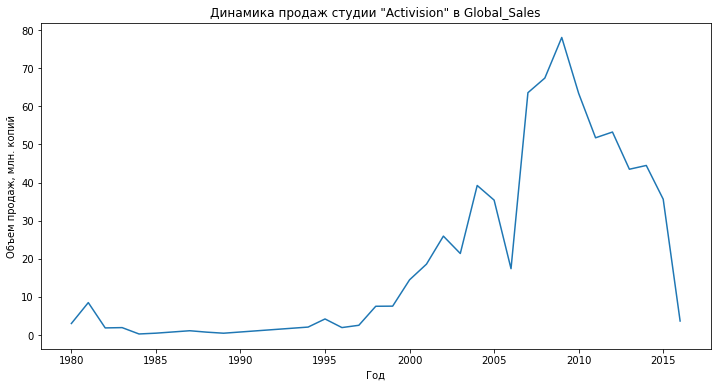

In [ ]:
sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']

for i_sales in sales:
    data = df[df['Publisher'] == 'Activision'].groupby('Year')[i_sales].sum()
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(data)
    ax.set_title('Динамика продаж студии "Activision" в ' + i_sales)
    ax.set_xlabel('Год')
    ax.set_ylabel('Объем продаж, млн. копий')

plt.show()


### Задача 4

Постройте такие же линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире на одном полотне в сетке 2 на 2 графика. Итоговое полотно сделайте размером 12 на 12. Все графики должны разделять оси X и Y

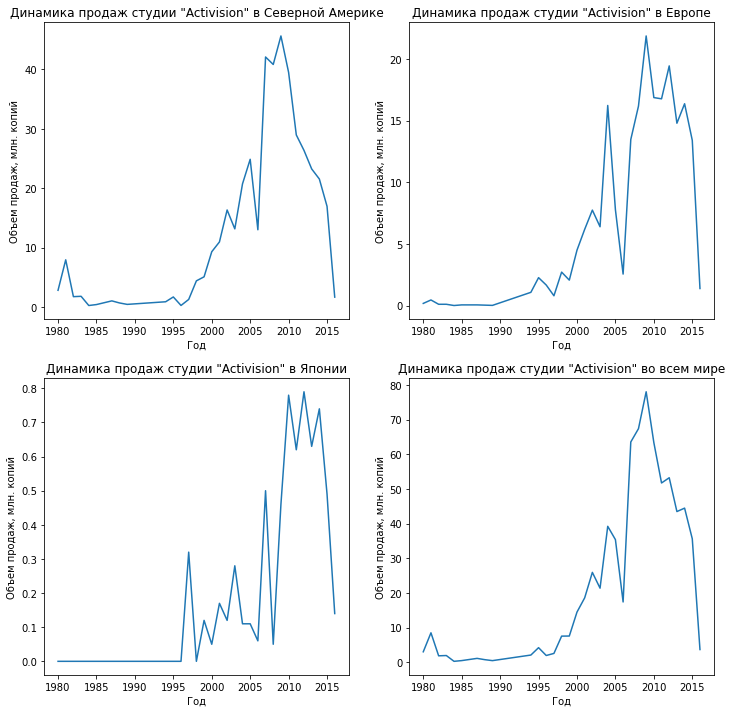

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12), ncols=2, nrows=2)

data1 = df[df['Publisher'] == 'Activision'].groupby('Year')['NA_Sales'].sum()
data2 = df[df['Publisher'] == 'Activision'].groupby('Year')['EU_Sales'].sum()
data3 = df[df['Publisher'] == 'Activision'].groupby('Year')['JP_Sales'].sum()
data4 = df[df['Publisher'] == 'Activision'].groupby('Year')['Global_Sales'].sum()

ax[0][0].plot(data1)
ax[0][1].plot(data2)
ax[1][0].plot(data3)
ax[1][1].plot(data4)

ax[0][0].set_title('Динамика продаж студии "Activision" в Северной Америке')
ax[0][0].set_xlabel('Год')
ax[0][0].set_ylabel('Объем продаж, млн. копий')
ax[0][1].set_title('Динамика продаж студии "Activision" в Европе')
ax[0][1].set_xlabel('Год')
ax[0][1].set_ylabel('Объем продаж, млн. копий')
ax[1][0].set_title('Динамика продаж студии "Activision" в Японии')
ax[1][0].set_xlabel('Год')
ax[1][0].set_ylabel('Объем продаж, млн. копий')
ax[1][1].set_title('Динамика продаж студии "Activision" во всем мире')
ax[1][1].set_xlabel('Год')
ax[1][1].set_ylabel('Объем продаж, млн. копий')

plt.show()


### Задача 5

В одной координатной сетке постройте 2 гистограммы распределения мировых продаж игр издателей "Microsoft Game Studios" и "Take-Two Interactive" после 2010 года (включая 2010 год). Графики сделайте полупрозрачными, отсечки должны быть общими и соответствовать ширине столбцов обоих графиков

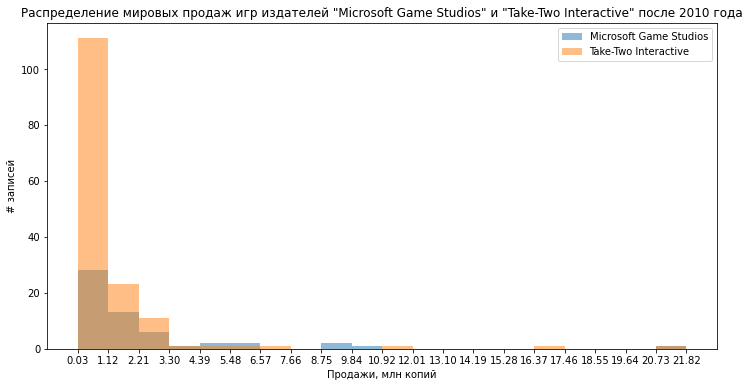

In [ ]:
data1 = df[(df['Publisher'] == 'Microsoft Game Studios') & (df['Year'] >= 2010)]['Global_Sales']
data2 = df[(df['Publisher'] == 'Take-Two Interactive') & (df['Year'] >= 2010)]['Global_Sales']

fig, ax = plt.subplots(figsize=(12,6))
_, bins, _ = ax.hist(data1, label='Microsoft Game Studios', alpha=0.5, bins=20)
ax.hist(data2, label='Take-Two Interactive', alpha=0.5, bins=bins)


ax.set_title('Распределение мировых продаж игр издателей "Microsoft Game Studios" и "Take-Two Interactive" после 2010 года')
ax.set_xlabel('Продажи, млн копий')
ax.set_ylabel('# записей')
ax.set_xticks(list(bins))
ax.legend()

plt.show()


### Задача 6

Определите 5 платформ, для которых в Японии было продано больше всего игр за все время. Проиллюстрируйте величину продаж на столбчатой диаграмме, столбец с самым высоким значением окрасьте зеленым, а с самым низким - красным

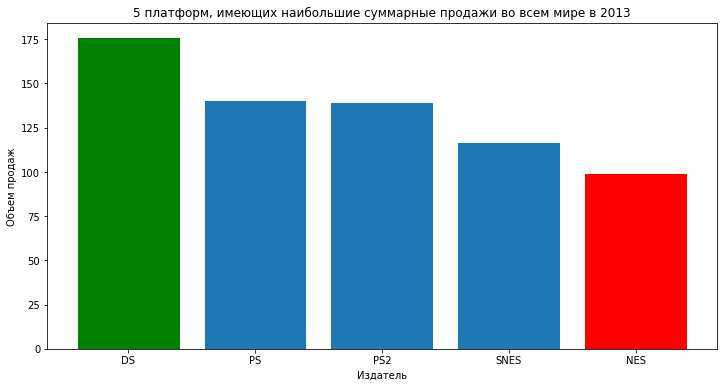

In [ ]:
data = df.groupby('Platform')['JP_Sales'].sum().sort_values(ascending=False)
plat = pd.DataFrame(data)
top_5 = plat.iloc[:5]
fig, ax = plt.subplots(figsize=(12,6))
x, _, _, _, y, = ax.bar(top_5.index, top_5['JP_Sales'])
x.set_color('green')
y.set_color('red')
ax.set_title("5 платформ, имеющих наибольшие суммарные продажи во всем мире в 2013")
ax.set_ylabel('Объем продаж')
ax.set_xlabel('Платформа')


plt.show()

## Дополнительные (необязательные) задачи


### Задача 7

Постройте линейный график динамики количества игр, выпускаемых Nintendo, по годам. С помощью numpy или pandas определите промежуток, в который издатель каждый год выпускал больше 35 игр, и подсветите этот промежуток времени с помощью зеленого полупрозрачного прямоугольника

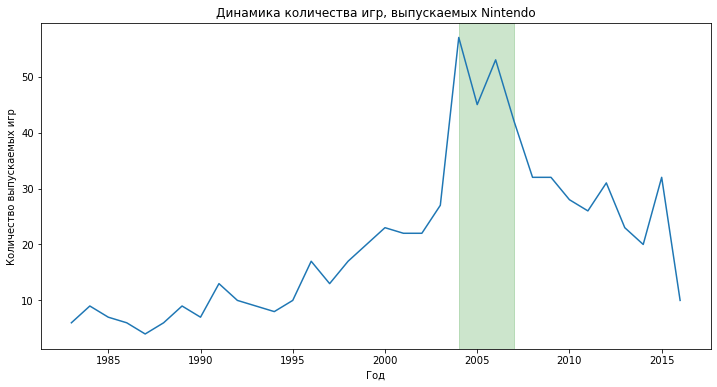

In [ ]:
data=df[df['Publisher'] == 'Nintendo'][['Name','Year']]
data1 = data.groupby('Year').count()
year_min = 0
year_max = 0

for i in range(34):
    if list(data1.iloc[i])[0] > 35:
        year_min = i
        break
for i in range(33, year_min, -1):
    if list(data1.iloc[i])[0] > 35:
        year_max = i
        break
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(data1)
ax.axvspan(xmin=data1.index[year_min], xmax=data1.index[year_max], color='green', alpha=0.2)
ax.set_title('Динамика количества игр, выпускаемых Nintendo')
ax.set_xlabel('Год')
ax.set_ylabel('Количество выпускаемых игр')
plt.show()